# Violencia de Genero - Dataset Vicente Lopez

Este proyecto tiene como objetivo analizar los casos de Violencia de Genero en el municipio de vicente lopez.

Importamos Librerias:

In [19]:
#Importar paquetes de herramientas:

#Datos
import pandas as pd
import numpy as np
import requests
from io import StringIO
import datetime
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

## Dataset

El dataset a utilizar se encuentra en: http://vicentelopez.opendata.junar.com/datasets/189974/violencia-de-genero/

In [20]:
#Importamos el dataset
ds_tickets = pd.read_excel('tickets_violencia_.xlsx')

#Obtenemos la cantidad de filas
filas = np.shape(ds_tickets)[0] 
print(f'Filas: {filas}')

#Obtenemos la cantidad de features o columnas
columnas = np.shape(ds_tickets)[1]
print(f'Columnas: {columnas}\r\n')

Filas: 10731
Columnas: 11



In [21]:
#Imprimimos las primeras filas
ds_tickets.head()

,fecha_creacion_ticket,fecha_cierre_ticket,estadoticket,resultado_ticket,fecha_hora_ini_llamada,fecha_hora_fin_llamada,nombre_tipo_evento,nombre_subtipo_evento,origen_llamada,fecha_hora_asig,fecha_hora_arrib
0,2017-12-19 17:15:07,2017-12-19 16:10:07,Cerrado,Positivo,2017-12-19 17:13:16,2017-12-19 17:15:06,ConfrontaciÃ³n,Familiar,911,2017-12-19 17:26:48,2017-12-19 17:27:16
1,2017-12-19 20:40:08,2017-12-19 19:24:59,Cerrado,Positivo,2017-12-19 20:38:17,2017-12-19 20:40:08,Violencia Familiar No Infantil,Familiar,911,2017-12-19 20:42:34,2017-12-19 20:43:11
2,2017-12-19 22:44:21,2017-12-19 21:31:21,Cerrado,Negativo,2017-12-19 22:43:43,2017-12-19 22:44:21,ConfrontaciÃ³n,Familiar,911,2017-12-19 22:51:48,2017-12-19 22:52:00
3,2017-12-19 23:24:49,2017-12-19 21:35:39,Cerrado,Negativo,2017-12-19 23:24:23,2017-12-19 23:24:49,ConfrontaciÃ³n,Familiar,911,2017-12-19 23:35:53,NaT
4,2017-12-19 23:39:56,2017-12-19 21:36:33,Cerrado,Negativo,2017-12-19 23:39:23,2017-12-19 23:39:56,Violencia Familiar No Infantil,De Genero,911,2017-12-19 23:40:54,2017-12-19 23:44:49


In [22]:
#Cambiamos la codificación de la columna nombre_tipo_evento
ds_tickets['nombre_tipo_evento'].replace({'á':'a','é':'e','í':'i','ó':'o','ú':'u'})
ds_tickets['nombre_tipo_evento'] = ds_tickets['nombre_tipo_evento'].str.encode('latin-1').str.decode('utf-8', 'ignore')
ds_tickets.head()

,fecha_creacion_ticket,fecha_cierre_ticket,estadoticket,resultado_ticket,fecha_hora_ini_llamada,fecha_hora_fin_llamada,nombre_tipo_evento,nombre_subtipo_evento,origen_llamada,fecha_hora_asig,fecha_hora_arrib
0,2017-12-19 17:15:07,2017-12-19 16:10:07,Cerrado,Positivo,2017-12-19 17:13:16,2017-12-19 17:15:06,Confrontación,Familiar,911,2017-12-19 17:26:48,2017-12-19 17:27:16
1,2017-12-19 20:40:08,2017-12-19 19:24:59,Cerrado,Positivo,2017-12-19 20:38:17,2017-12-19 20:40:08,Violencia Familiar No Infantil,Familiar,911,2017-12-19 20:42:34,2017-12-19 20:43:11
2,2017-12-19 22:44:21,2017-12-19 21:31:21,Cerrado,Negativo,2017-12-19 22:43:43,2017-12-19 22:44:21,Confrontación,Familiar,911,2017-12-19 22:51:48,2017-12-19 22:52:00
3,2017-12-19 23:24:49,2017-12-19 21:35:39,Cerrado,Negativo,2017-12-19 23:24:23,2017-12-19 23:24:49,Confrontación,Familiar,911,2017-12-19 23:35:53,NaT
4,2017-12-19 23:39:56,2017-12-19 21:36:33,Cerrado,Negativo,2017-12-19 23:39:23,2017-12-19 23:39:56,Violencia Familiar No Infantil,De Genero,911,2017-12-19 23:40:54,2017-12-19 23:44:49


In [23]:
#Vemos que columnas tenemos
ds_tickets.columns.values

array(['fecha_creacion_ticket', 'fecha_cierre_ticket', 'estadoticket',
       'resultado_ticket', 'fecha_hora_ini_llamada',
       'fecha_hora_fin_llamada', 'nombre_tipo_evento',
       'nombre_subtipo_evento', 'origen_llamada', 'fecha_hora_asig',
       'fecha_hora_arrib'], dtype=object)

In [24]:
#Revisemos los tipos de casos que hay
ds_tickets.nombre_tipo_evento.unique()

array(['Confrontación', 'Violencia Familiar No Infantil',
       'Boton de Panico', 'Alarmas', 'Botón de Pánico',
       'Violencia de Genero'], dtype=object)

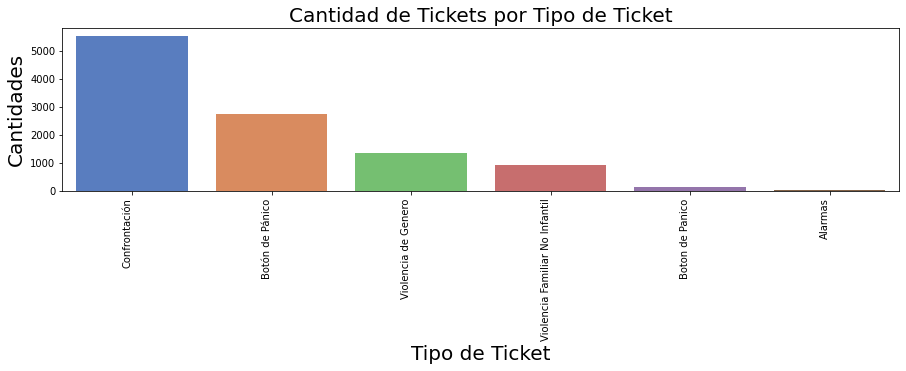

In [25]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="nombre_tipo_evento", data=ds_tickets,
                  palette = "muted",
                 order = ds_tickets['nombre_tipo_evento'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de Tickets por Tipo de Ticket', size = 20)
plt.xlabel("Tipo de Ticket", size = 20)
plt.ylabel("Cantidades", size = 20)
plt.show()

Como podemos ver en el gráfico anterior, nuestro dataset tiene varias 6 categorías de tickets.

In [27]:
#Tomamos el dato de fecha y creamos columnas con los datos desagregados
ds_tickets['fecha_c_ticket'] = pd.to_datetime(ds_tickets['fecha_creacion_ticket'])
ds_tickets['hora_c_ticket'] = [d.time() for d in ds_tickets['fecha_creacion_ticket']]
ds_tickets['anio_ticket'] = ds_tickets.fecha_creacion_ticket.dt.year
ds_tickets['mes_ticket'] = ds_tickets.fecha_creacion_ticket.dt.month

In [28]:
ds_tickets.head()

,fecha_creacion_ticket,fecha_cierre_ticket,estadoticket,resultado_ticket,fecha_hora_ini_llamada,fecha_hora_fin_llamada,nombre_tipo_evento,nombre_subtipo_evento,origen_llamada,fecha_hora_asig,fecha_hora_arrib,fecha_c_ticket,hora_c_ticket,anio_ticket,mes_ticket
0,2017-12-19 17:15:07,2017-12-19 16:10:07,Cerrado,Positivo,2017-12-19 17:13:16,2017-12-19 17:15:06,Confrontación,Familiar,911,2017-12-19 17:26:48,2017-12-19 17:27:16,2017-12-19 17:15:07,17:15:07,2017,12
1,2017-12-19 20:40:08,2017-12-19 19:24:59,Cerrado,Positivo,2017-12-19 20:38:17,2017-12-19 20:40:08,Violencia Familiar No Infantil,Familiar,911,2017-12-19 20:42:34,2017-12-19 20:43:11,2017-12-19 20:40:08,20:40:08,2017,12
2,2017-12-19 22:44:21,2017-12-19 21:31:21,Cerrado,Negativo,2017-12-19 22:43:43,2017-12-19 22:44:21,Confrontación,Familiar,911,2017-12-19 22:51:48,2017-12-19 22:52:00,2017-12-19 22:44:21,22:44:21,2017,12
3,2017-12-19 23:24:49,2017-12-19 21:35:39,Cerrado,Negativo,2017-12-19 23:24:23,2017-12-19 23:24:49,Confrontación,Familiar,911,2017-12-19 23:35:53,NaT,2017-12-19 23:24:49,23:24:49,2017,12
4,2017-12-19 23:39:56,2017-12-19 21:36:33,Cerrado,Negativo,2017-12-19 23:39:23,2017-12-19 23:39:56,Violencia Familiar No Infantil,De Genero,911,2017-12-19 23:40:54,2017-12-19 23:44:49,2017-12-19 23:39:56,23:39:56,2017,12


<AxesSubplot:xlabel='anio_ticket', ylabel='count'>

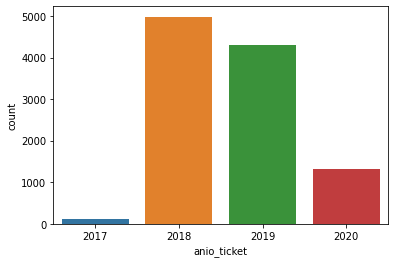

In [29]:
#Graficamos las evolucion anual de los tickets
sns.countplot(data = ds_tickets, x = "anio_ticket")

In [30]:
ds_tickets[(ds_tickets['anio_ticket'] == 2017)].fecha_creacion_ticket.dt.month.unique()

array([12], dtype=int64)

Vemos que del año 2017 solamente tenemos datos de diciembre, por lo tanto lo excluimos del dataset

<AxesSubplot:xlabel='anio_ticket', ylabel='count'>

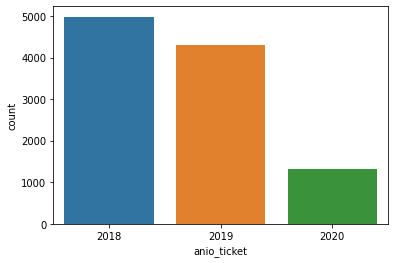

In [31]:
ds_tickets = ds_tickets[ds_tickets['anio_ticket'] != 2017]
#Graficamos las evolucion mensual para el año 2019
sns.countplot(data = ds_tickets, x = "anio_ticket")

<AxesSubplot:xlabel='mes', ylabel='tickets'>

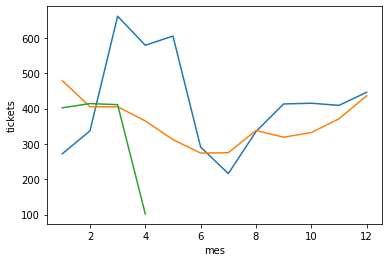

In [32]:
#Agrupamos los datos por año y mes
ds_tickets_agrupados = ds_tickets[["anio_ticket","mes_ticket"]].groupby(['anio_ticket','mes_ticket']).size().reset_index()
ds_tickets_agrupados.columns = ['anio', 'mes', 'tickets']


#Graficamos las curvas de distribución a lo largo de cada año y las comparamos
sns.lineplot(data=ds_tickets_agrupados[ds_tickets_agrupados['anio']==2018][['mes', 'tickets']], x='mes', y='tickets')
sns.lineplot(data=ds_tickets_agrupados[ds_tickets_agrupados['anio']==2019][['mes', 'tickets']], x='mes', y='tickets')
sns.lineplot(data=ds_tickets_agrupados[ds_tickets_agrupados['anio']==2020][['mes', 'tickets']], x='mes', y='tickets')